<a href="https://colab.research.google.com/github/lastinm/s3_hakaton_group10/blob/main/%D0%A5%D0%B0%D0%BA%D0%B0%D1%82%D0%BE%D0%BD_3_%D1%81%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA в NLP: идеи проверок

# Шаг 1: Анализ баланса классов

In [3]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Полный путь к zip файлу
zip_file_path = '/content/drive/MyDrive/Data/geo-reviews-dataset-2023.zip'
# Имя CSV файла внутри архива
csv_file_name = 'geo-reviews-dataset-2023_1.csv'

# Чтение CSV файла напрямую из zip архива
df = pd.read_csv('/content/drive/MyDrive/Data/geo-reviews-dataset-2023.zip', compression='zip', header=0, sep='|')
df.head()

,address,name_ru,rating,rubrics,text
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...


In [5]:
# Считаем количество записей в каждом классе
class_balance = df['rating'].value_counts().sort_index()
print(class_balance)

rating
0       200
1     34351
2     12088
3     21686
4     41160
5    390515
Name: count, dtype: int64


## Шаг 2: Визуализация баланса классов

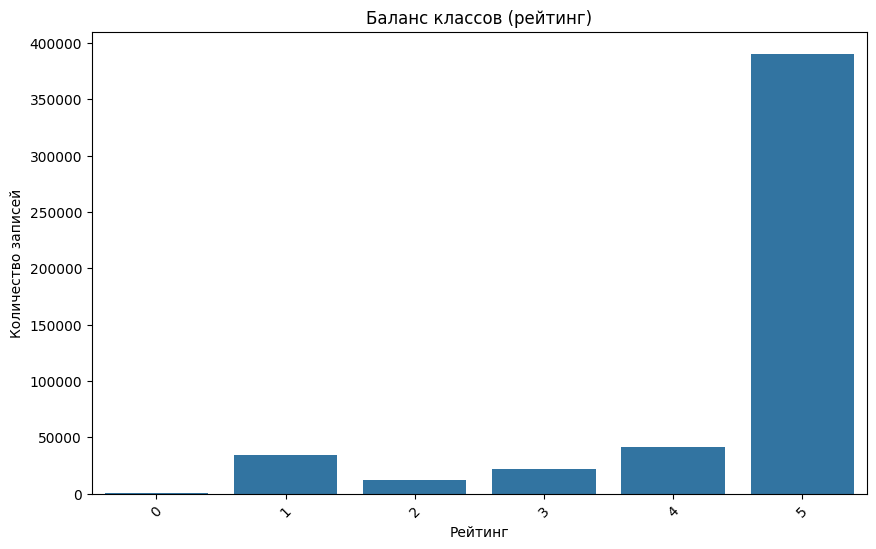

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=class_balance.index, y=class_balance.values)
plt.title('Баланс классов (рейтинг)')
plt.xlabel('Рейтинг')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

Наглядно видно, что класс "5 баллов" заметно превышает все другие.

## Шаг 3: Исследование других характеристик данных

### Исследование текста:
* Посчитать длину отзывов и посмотреть, как она соотносится с рейтингом.
* Проанализировать частотность слов для выявления тем и настроений.

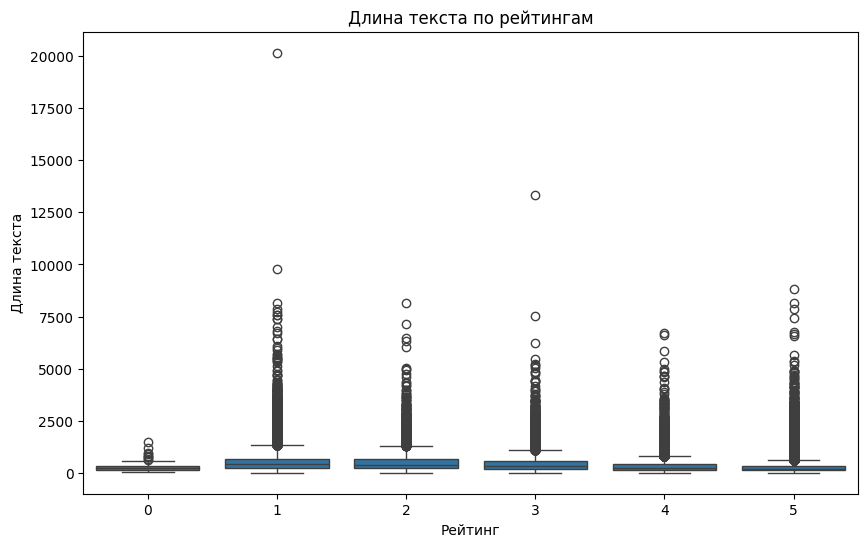

In [7]:
# Добавляем столбец с длиной текста
df['text_length'] = df['text'].apply(len)

# Смотрим на зависимость длины текста от рейтинга
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='text_length', data=df)
plt.title('Длина текста по рейтингам')
plt.xlabel('Рейтинг')
plt.ylabel('Длина текста')
plt.show()

Оценивая на 2 или на 5 люди желают более подробно прокомментировать свою оценку.

### Распределение длин слов объектов в сообщениях

Произведем анали на примере из 50 строк данных, чтобы слишком не нагружать систему.

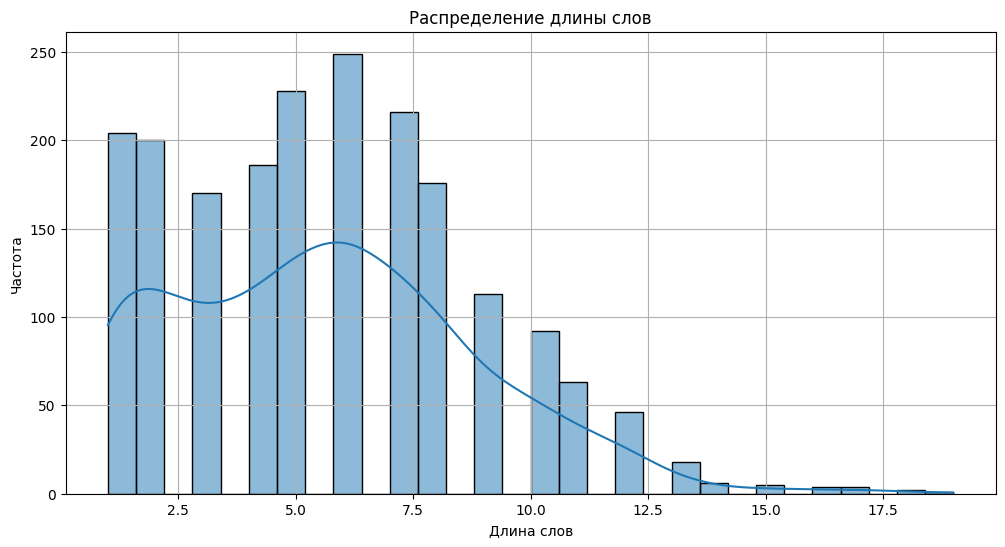

In [10]:
import re

# Выбор первых 50 строк
data = df.head(50)

# Функция для извлечения длины слов из текста
def extract_word_lengths(text):
    words = re.findall(r'\b\w+\b', text)  # Извлеките слова
    return [len(word) for word in words]

# Соберем длину слов из нужной колонки 'text'
word_lengths = []
for entry in data['text']:
    word_lengths.extend(extract_word_lengths(entry))

# Визуализация распределения длины слов
plt.figure(figsize=(12, 6))
sns.histplot(word_lengths, bins=30, kde=True)
plt.title('Распределение длины слов')
plt.xlabel('Длина слов')
plt.ylabel('Частота')
plt.grid()
plt.show()
